In [20]:
heart_data = pd.read_csv(r"heart.csv")
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
       Model_Name Fold_Number  Accuracy  Precision    Recall  F1-Score  \
0   Random Forest           1  0.838710   0.875000  0.823529  0.848485   
1   Random Forest           2  0.935484   0.894737  1.000000  0.944444   
2   Random Forest           3  0.741935   0.846154  0.647059  0.733333   
3   Random Forest           4  0.866667   0.882353  0.882353  0.882353   
4   Random Forest           5  0.733333   0.764706  0.764706  0.764706   
5   Random Forest           6  0.766667   0.714286  0.937500  0.810811   
6   Random Forest           7  0.833333   0.789474  0.937500  0.857143   
7   Random Forest           8  0.800000   0.812500  0.812500  0.812500   
8   Random Forest           9  0.866667   0.800000  1.000000  0.888889   
9   Random Forest          10  0.800000   0.857143  0.750000  0.800000   
10           LSTM         N/A  0.737705   0.729730  0.818182  0.771429   
11    Naive Bayes         N/A  0.819672   0.789474  0.909091  0.845070   

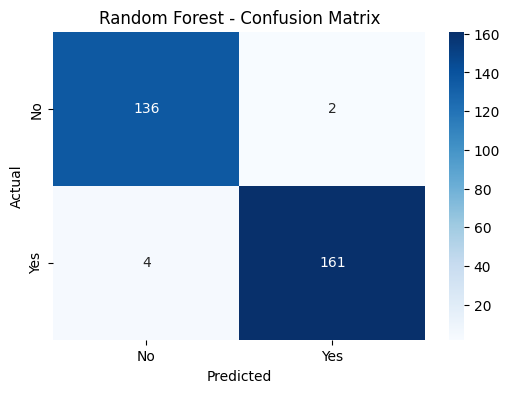

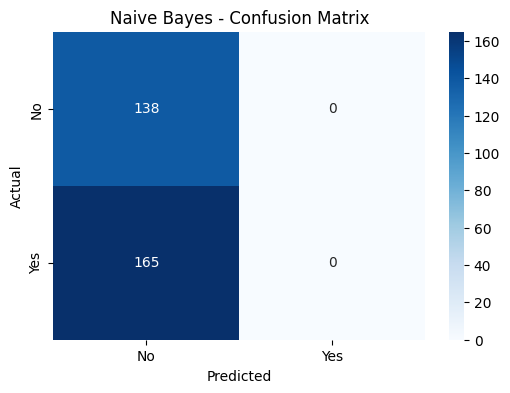

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


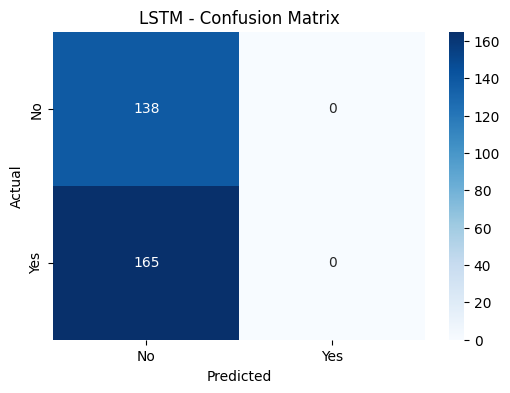

           Model  Average Accuracy  Average F1-Score  Average TSS  Average HSS
0           LSTM          0.737705          0.771429     0.636364     0.466083
1    Naive Bayes          0.819672          0.845070     0.818182     0.631925
2  Random Forest          0.818280          0.834266     0.711029     0.633026

The best model for this dataset based on Average Accuracy is: Naive Bayes with an Accuracy of 0.8197.
Models saved successfully!


In [19]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
heart_data = pd.read_csv(r"heart.csv")

# Feature and target extraction
features = heart_data.iloc[:, :-1].values  
labels = heart_data.iloc[:, -1].values   

# Function to compute performance metrics
def evaluate_model_performance(true_labels, predicted_labels):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    true_pos, false_neg, false_pos, true_neg = conf_matrix.ravel()
    acc = accuracy_score(true_labels, predicted_labels)
    prec = precision_score(true_labels, predicted_labels, zero_division=0)
    rec = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    false_pos_rate = false_pos / (false_pos + true_neg) if (false_pos + true_neg) > 0 else 0
    false_neg_rate = false_neg / (false_neg + true_pos) if (false_neg + true_pos) > 0 else 0
    tss_value = rec - false_pos_rate
    hss_value = (2 * (true_pos * true_neg - false_pos * false_neg)) / (
        (true_pos + false_neg) * (false_neg + true_neg) + (true_pos + false_pos) * (false_pos + true_neg)
    ) if (true_pos + false_neg + false_pos + true_neg) > 0 else 0

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "TSS": tss_value,
        "HSS": hss_value,
        "True_Positive": true_pos,
        "True_Negative": true_neg,
        "False_Positive": false_pos,
        "False_Negative": false_neg,
        "FPR": false_pos_rate,
        "FNR": false_neg_rate,
    }

# Initialize results dictionary with all expected keys
results_dict = {
    'Model_Name': [],
    'Fold_Number': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'True_Positive': [],
    'True_Negative': [],
    'False_Positive': [],
    'False_Negative': [],
    'FPR': [],
    'FNR': [],
    'TSS': [],
    'HSS': []
}

# StratifiedKFold for cross-validation
cv_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Function to train Random Forest
def train_random_forest(features, labels, cv_folds, results_dict, fold_counter=1):
    """Train Random Forest model using StratifiedKFold cross-validation."""
    rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)

    for train_indices, test_indices in cv_folds.split(features, labels):
        train_X, test_X = features[train_indices], features[test_indices]
        train_y, test_y = labels[train_indices], labels[test_indices]

        rf_model.fit(train_X, train_y)
        rf_predictions = rf_model.predict(test_X)

        rf_metrics = evaluate_model_performance(test_y, rf_predictions)
        for key, value in rf_metrics.items():
            results_dict[key].append(value)
        results_dict['Model_Name'].append('Random Forest')
        results_dict['Fold_Number'].append(fold_counter)
        fold_counter += 1
    
    return rf_model

# Function to train LSTM model
def train_lstm(features, labels):
    """Train LSTM model."""
    normalizer = StandardScaler()
    normalized_features = normalizer.fit_transform(features)

    train_X_lstm, test_X_lstm, train_y_lstm, test_y_lstm = train_test_split(normalized_features, labels, test_size=0.2, random_state=42, stratify=labels)
    train_X_lstm = train_X_lstm.reshape(train_X_lstm.shape[0], train_X_lstm.shape[1], 1)
    test_X_lstm = test_X_lstm.reshape(test_X_lstm.shape[0], test_X_lstm.shape[1], 1)

    lstm_model = Sequential([
        LSTM(128, activation='relu', input_shape=(train_X_lstm.shape[1], 1)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    lstm_model.fit(train_X_lstm, train_y_lstm, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    lstm_predictions = (lstm_model.predict(test_X_lstm) > 0.5).astype(int)
    lstm_metrics = evaluate_model_performance(test_y_lstm, lstm_predictions)

    return lstm_model, lstm_metrics

# Function to train Naive Bayes model
def train_naive_bayes(features, labels):
    """Train Naive Bayes model."""
    normalizer = StandardScaler()
    normalized_features = normalizer.fit_transform(features)

    train_X_lstm, test_X_lstm, train_y_lstm, test_y_lstm = train_test_split(normalized_features, labels, test_size=0.2, random_state=42, stratify=labels)
    bayes_model = GaussianNB()
    bayes_model.fit(train_X_lstm, train_y_lstm)
    bayes_predictions = bayes_model.predict(test_X_lstm)

    bayes_metrics = evaluate_model_performance(test_y_lstm, bayes_predictions)
    
    return bayes_model, bayes_metrics

# Main function to run models and evaluate performance
def main():
    """Main function to execute the models and gather results."""
    # Train Random Forest
    fold_counter = 1  # Initialize fold_counter
    rf_model = train_random_forest(features, labels, cv_folds, results_dict, fold_counter)

    # Train LSTM model
    lstm_model, lstm_metrics = train_lstm(features, labels)

    # Train Naive Bayes model
    bayes_model, bayes_metrics = train_naive_bayes(features, labels)

    # Add LSTM and Naive Bayes results to results_dict
    for key, value in lstm_metrics.items():
        results_dict[key].append(value)
    results_dict['Model_Name'].append('LSTM')
    results_dict['Fold_Number'].append('N/A')  # LSTM doesn't use CV

    for key, value in bayes_metrics.items():
        results_dict[key].append(value)
    results_dict['Model_Name'].append('Naive Bayes')
    results_dict['Fold_Number'].append('N/A')

    # Convert results to DataFrame
    results_df = pd.DataFrame(results_dict)

    # Print the results
    print(results_df)

    # Calculate average metrics for each model and compare
    average_metrics = results_df.groupby('Model_Name').mean(numeric_only=True)


    # Plot Confusion Matrices
    def plot_confusion_matrix(y_test, y_pred, title):
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.title(f'{title} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Plot for each model
    rf_predictions = rf_model.predict(features)
    plot_confusion_matrix(labels, rf_predictions, "Random Forest")

    bayes_predictions = bayes_model.predict(features)
    plot_confusion_matrix(labels, bayes_predictions, "Naive Bayes")

    lstm_predictions = (lstm_model.predict(features.reshape(features.shape[0], features.shape[1], 1)) > 0.5).astype(int)
    plot_confusion_matrix(labels, lstm_predictions, "LSTM")

    # Compare models based on average metrics
    comparison = {
        "Model": [],
        "Average Accuracy": [],
        "Average F1-Score": [],
        "Average TSS": [],
        "Average HSS": []
    }

    for model in average_metrics.index:
        comparison["Model"].append(model)
        comparison["Average Accuracy"].append(average_metrics.loc[model, "Accuracy"])
        comparison["Average F1-Score"].append(average_metrics.loc[model, "F1-Score"])
        comparison["Average TSS"].append(average_metrics.loc[model, "TSS"])
        comparison["Average HSS"].append(average_metrics.loc[model, "HSS"])

    comparison_df = pd.DataFrame(comparison)

    # Print model comparison
    print(comparison_df)



    # Identify the best model based on Average Accuracy
    best_model_row = comparison_df.loc[comparison_df['Average Accuracy'].idxmax()]
    best_model_name = best_model_row['Model']
    best_model_accuracy = best_model_row['Average Accuracy']

    # Add a line to print which model is best
    best_model_summary = f"\nThe best model for this dataset based on Average Accuracy is: {best_model_name} with an Accuracy of {best_model_accuracy:.4f}."
    print(best_model_summary)



    # Save models
    models_dir = "models"
    if not os.path.exists(models_dir):
        os.makedirs(models_dir)

    joblib.dump(rf_model, os.path.join(models_dir, "random_forest_model.pkl"))
    joblib.dump(bayes_model, os.path.join(models_dir, "naive_bayes_model.pkl"))
    lstm_model.save(os.path.join(models_dir, "lstm_model.h5"))
    print("Models saved successfully!")

if __name__ == "__main__":
    main()
